# Task 2: Quantitative Analysis using Technical Indicators

This notebook performs quantitative analysis on stock data using various technical indicators and financial metrics. We'll use our custom `QuantitativeAnalyzer` class to:

1. Load and clean stock price data
2. Calculate technical indicators
3. Visualize the data and indicators
4. Calculate key financial metrics

In [1]:
# Import necessary libraries and setup path
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import our custom modules
from src.Quantitative_Analysis import QuantitativeAnalyzer
from src.Data_Cleaner import check_data_quality, clean_data, save_cleaned_data

%matplotlib inline

## 1. Initialize the Quantitative Analyzer

First, we'll create an instance of our `QuantitativeAnalyzer` class that will handle all our analysis tasks.

In [2]:
# Create analyzer instance
analyzer = QuantitativeAnalyzer()
print("Analyzer initialized successfully!")

Analyzer initialized successfully!


## 2. Load and Prepare Stock Data

Let's load stock data for analysis. We'll use Apple (AAPL) as an example.

In [3]:
# Define analysis parameters
symbol = 'AAPL'  # Apple stock
start_date = '2022-01-01'
end_date = '2024-01-01'

# Load the stock data
print(f"Loading data for {symbol}...")
stock_data = analyzer.load_stock_data(symbol, start_date, end_date)

if stock_data is not None:
    # Display basic information about the data
    print("\nInitial data summary:")
    print(stock_data.info())
    
    # Check data quality
    quality_report = check_data_quality(stock_data)
    print("\nStock data quality report:")
    print(quality_report)
    
    # Clean the data
    print("\nCleaning data...")
    cleaned_stock_data = clean_data(stock_data, 
                                  remove_duplicates=True, 
                                  remove_na=True)
    
    # Save the cleaned data
    save_cleaned_data(cleaned_stock_data, 
                     f"cleaned_{symbol}_stock_data(yfinance_Downloaded).csv",
                     output_dir="../Data/cleaned")
else:
    print(f"Failed to load data for {symbol}")

Loading data for AAPL...
YF.download() has changed argument auto_adjust default to True

Initial data summary:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     501 non-null    float64
 1   (High, AAPL)      501 non-null    float64
 2   (Low, AAPL)       501 non-null    float64
 3   (Open, AAPL)      501 non-null    float64
 4   (Volume, AAPL)    501 non-null    int64  
 5   (Daily_Return, )  500 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 27.4 KB
None

Stock data quality report:
{'total_rows': 501, 'duplicates': np.int64(0), 'missing_values': {('Close', 'AAPL'): np.int64(0), ('High', 'AAPL'): np.int64(0), ('Low', 'AAPL'): np.int64(0), ('Open', 'AAPL'): np.int64(0), ('Volume', 'AAPL'): np.int64(0), ('Daily_Return', ''): np.int64(1)}, 'data_types': {('Close', 'AAPL'): 'float64', ('

## 3. Calculate Technical Indicators

Now we'll calculate various technical indicators using TA-Lib, including:
- Moving Averages (20, 50, 200 days)
- RSI (Relative Strength Index)
- MACD (Moving Average Convergence Divergence)
- Bollinger Bands
- ATR (Average True Range)
- Stochastic Oscillator

In [4]:
# Calculate technical indicators
stock_data_with_indicators = analyzer.calculate_technical_indicators(stock_data)
if stock_data_with_indicators is not None:
    print("Technical indicators calculated successfully!")
    # Display the last few rows with indicators 
stock_data_with_indicators.iloc[20:].head(10) .isna().sum()

Technical indicators calculated successfully!


Price         Ticker
Close         AAPL       0
High          AAPL       0
Low           AAPL       0
Open          AAPL       0
Volume        AAPL       0
Daily_Return             0
MA_20                    0
MA_50                   10
MA_200                  10
RSI                      0
MACD                    10
MACD_Signal             10
MACD_Hist               10
BB_Upper                 0
BB_Middle                0
BB_Lower                 0
ATR                      0
STOCH_K                  0
STOCH_D                  0
dtype: int64

## 4. Visualize Technical Analysis

Let's create comprehensive visualizations of our technical analysis, including:
1. Price chart with Moving Averages
2. RSI indicator
3. MACD
4. Bollinger Bands
5. Stochastic Oscillator

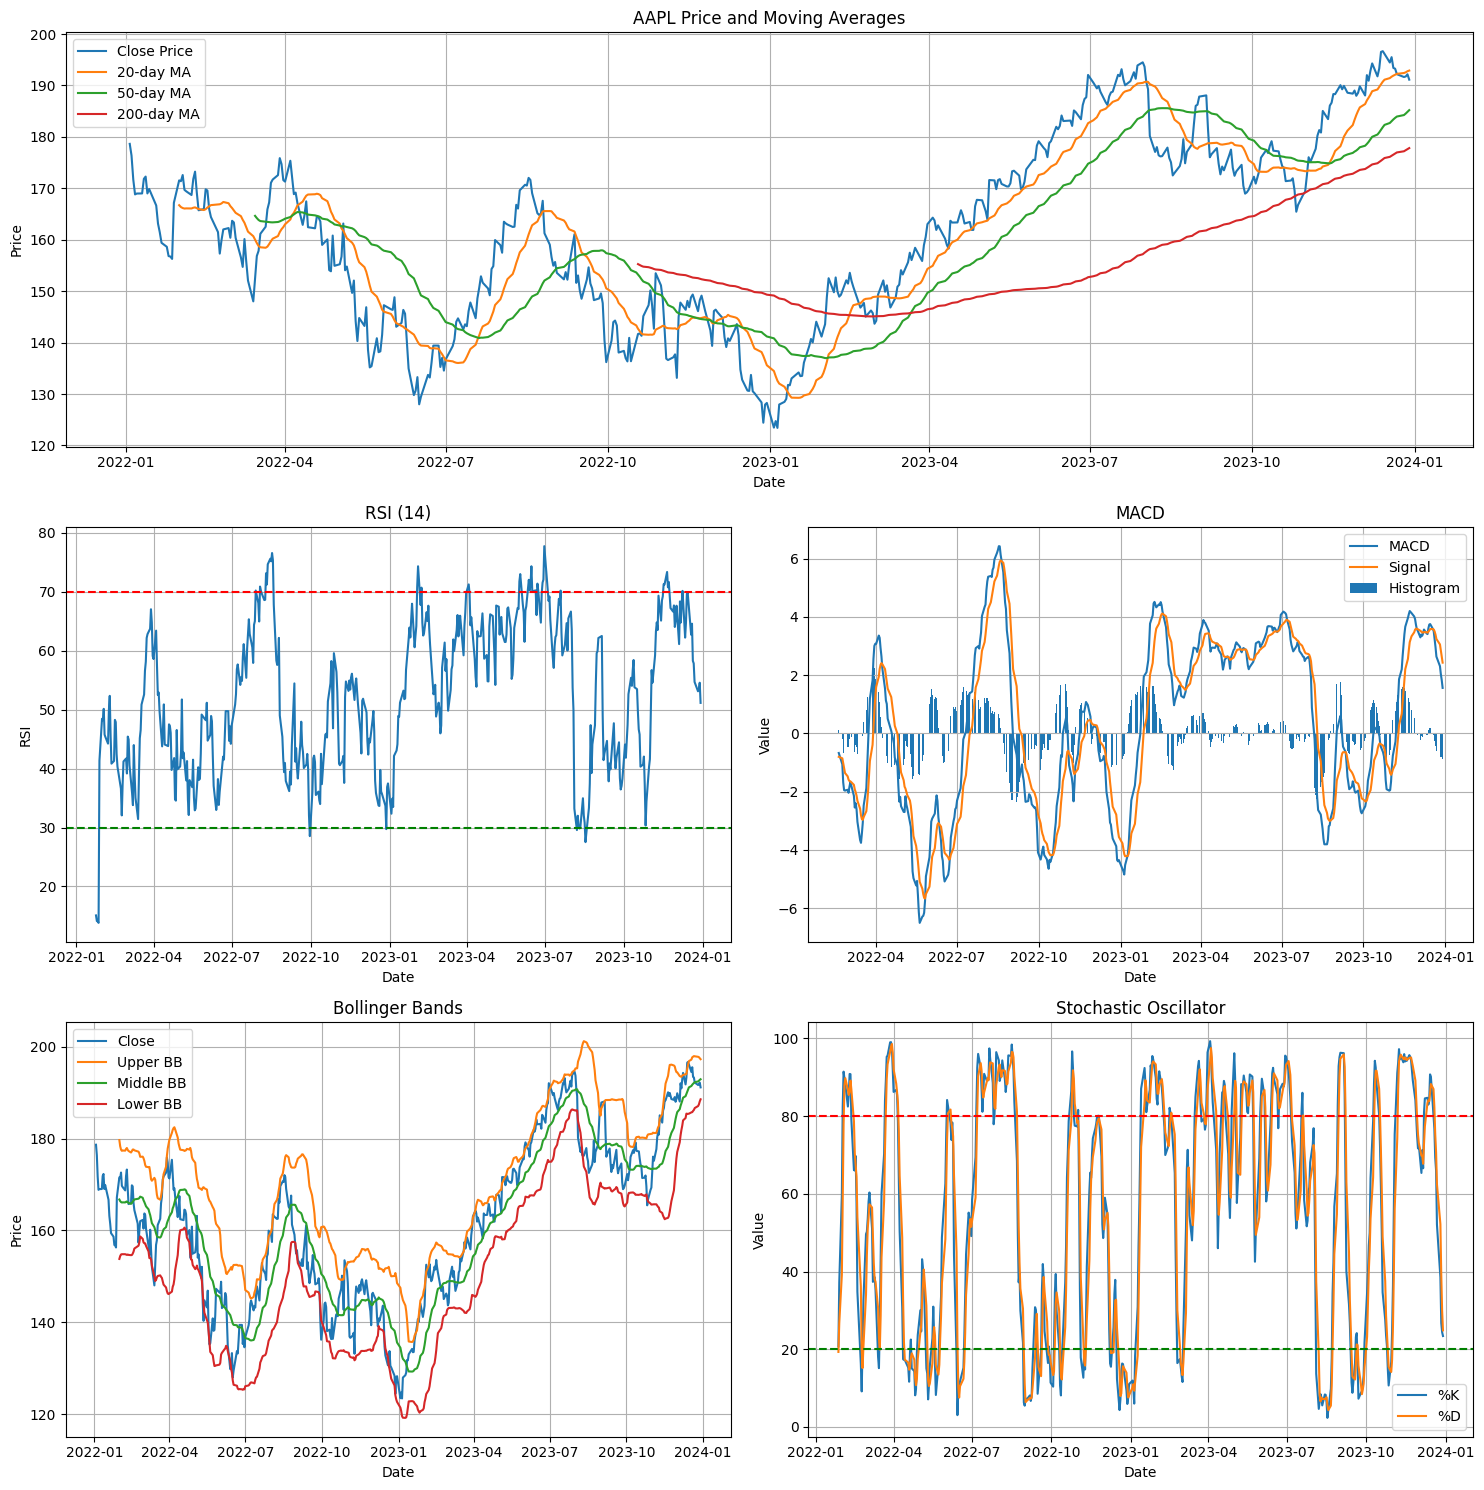

In [5]:
# Create technical analysis plots
analyzer.plot_technical_analysis(stock_data_with_indicators, symbol)

## 5. Calculate Advanced Financial Metrics

Finally, let's calculate and analyze advanced financial metrics including:
- Risk-adjusted returns (Sharpe Ratio, Sortino Ratio)
- Risk metrics (Maximum Drawdown, Value at Risk)
- Technical metrics (Latest RSI, MACD, Bollinger Band width)

In [6]:
# Calculate advanced metrics
metrics = analyzer.calculate_advanced_metrics(stock_data_with_indicators)

# Display metrics in a more readable format
if metrics:
    print(f"\nAdvanced Financial Metrics for {symbol}:")
    print("\nBasic Metrics:")
    print(f"Daily Returns Mean: {metrics['daily_returns_mean']:.4f}")
    print(f"Annualized Volatility: {metrics['annualized_volatility']:.4f}")
    print(f"Total Return: {metrics['total_return']:.4f}")
    
    print("\nRisk-Adjusted Metrics:")
    print(f"Sharpe Ratio: {metrics['sharpe_ratio']:.4f}")
    print(f"Sortino Ratio: {metrics['sortino_ratio']:.4f}")
    
    print("\nRisk Metrics:")
    print(f"Maximum Drawdown: {metrics['max_drawdown']:.4f}")
    print(f"95% VaR: {metrics['var_95']:.4f}")
    print(f"95% CVaR: {metrics['cvar_95']:.4f}")
    
    print("\nTechnical Metrics:")
    print(f"Latest RSI: {metrics['rsi_latest']:.2f}")
    print(f"Latest MACD: {metrics['macd_latest']:.4f}")
    print(f"Bollinger Band Width: {metrics['bb_width']:.4f}")


Advanced Financial Metrics for AAPL:

Basic Metrics:
Daily Returns Mean: 0.0003
Annualized Volatility: 0.2908
Total Return: 0.0699

Risk-Adjusted Metrics:
Sharpe Ratio: 0.2619
Sortino Ratio: 0.3969

Risk Metrics:
Maximum Drawdown: -0.3091
95% VaR: -0.0301
95% CVaR: -0.0408

Technical Metrics:
Latest RSI: 51.12
Latest MACD: 1.5628
Bollinger Band Width: 0.0453


c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\src\Quantitative_Analysis.py:355: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'total_return': float((stock_data['Close'].iloc[-1] / stock_data['Close'].iloc[0]) - 1),
c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\src\Quantitative_Analysis.py:383: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(drawdown.min())


## 6. Analysis Summary

This notebook has demonstrated comprehensive quantitative analysis using:

1. **Technical Indicators**:
   - Moving Averages for trend identification
   - RSI for overbought/oversold conditions
   - MACD for trend momentum
   - Bollinger Bands for volatility
   - Stochastic Oscillator for price momentum

2. **Advanced Financial Metrics**:
   - Risk-adjusted return measures
   - Risk metrics for portfolio management
   - Technical analysis indicators

The analysis provides a comprehensive view of the stock's performance, risk, and technical conditions.